In [1]:
import numpy as np
import pints
import pints.plot
import pints_smol_moments_jit as toy
import matplotlib.pyplot as plt
from scipy.stats import moment
import pandas as pd



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [2]:

model = toy.SmolModel(None,None)


true_parameters = [0.0004, 500]


times = np.linspace(20, 97, 78)

df = pd.read_csv('s11_inference_input_multi_well_t_20.csv', header=None)
org_values = np.transpose(df.to_numpy())


# 1st moment is mean, 1st centred moment should be array 6
centred_moment_1 = moment(org_values, moment=1, axis=1)
centred_moment_2 = moment(org_values, moment=2, axis=1)
centred_moment_3 = moment(org_values, moment=3, axis=1)
centred_moment_4 = moment(org_values, moment=4, axis=1)
centred_moment_5 = moment(org_values, moment=5, axis=1)

centred_moments = np.zeros((78,5))
centred_moments[:,0] = centred_moment_1
centred_moments[:,1] = centred_moment_2
centred_moments[:,2] = centred_moment_3
centred_moments[:,3] = centred_moment_4
centred_moments[:,4] = centred_moment_5

# print(centred_moments.shape)


Add noise to the data (using random sampling from normal distribution)

In [3]:

# noise = 9
# values = org_values + np.random.normal(0, noise, org_values.shape)

size_noise = 5
noise_value = 25
# # Create a list with the specified size filled with a placeholder value
noise_arr = [noise_value for _ in range(size_noise)]
noise_arr[0] = 1
noise_arr[1] = 10


Set-up pints problem and log likelihoods

In [4]:

problem = pints.MultiOutputProblem(model, times, centred_moments)

log_likelihood = pints.GaussianLogLikelihood(problem)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)

print('Original problem dimension: ' + str(problem.n_parameters()))
print('New dimension: ' + str(log_likelihood.n_parameters()))
# print('New dimension: ' + str(log_likelihood_2.n_parameters()))

true_parameters += noise_arr
# print(true_parameters)



Original problem dimension: 2
New dimension: 7


Create uniform log prior

In [5]:

# Define the size of the list
size = 7
placeholder_lower_value = 0
placeholder_upper_value = 1000
 
# Create a list with the specified size filled with a placeholder value
prior_arr_lower = [placeholder_lower_value for _ in range(size)]
prior_arr_upper = [placeholder_upper_value for _ in range(size)]
prior_arr_lower[0] = 0.0001
prior_arr_upper[0] = 0.001
prior_arr_lower[1] = 1
prior_arr_upper[1] = 10000
prior_arr_lower[2] = 0
prior_arr_upper[2] = 10
prior_arr_lower[3] = 0
prior_arr_upper[3] = 20
prior_arr_lower[4] = 0
prior_arr_upper[4] = 2000
prior_arr_lower[5] = 0
prior_arr_upper[5] = 20000
prior_arr_lower[6] = 0
prior_arr_upper[6] = 400000


# log_prior = pints.UniformLogPrior(
#     [0.000001, 1, 1],
#     [0.01, 10000, 100]
#     )
log_prior = pints.UniformLogPrior(
    prior_arr_lower,
    prior_arr_upper
    )

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_19988/3566091831.py:29: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


In [11]:

xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 2000
mcmc = pints.MCMCController(log_posterior, 3, xs,method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)



Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0
1     492     0:01.1
2     996     0:02.4
3     1434    0:03.9
20    8808    0:22.1
40    17592   0:46.1
60    28776   1:14.1
80    41676   1:41.9
100   56970   2:10.8
120   75168   2:43.6
140   95295   3:18.7
160   118695   3:58.1
180   144618   4:41.5
200   173382   5:30.1
220   204006   6:19.7
240   237399   7:13.5
260   272499   8:09.6
280   310893   9:10.7
300   351933  10:16.9
320   396309  11:39.6
340   442728  13:06.8
360   492303  14:39.5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pints/_log_likelihoods.py:832: RuntimeWarning: invalid value encountered in divide
  - np.sum(error**2, axis=0) / (2 * sigma**2))


380   543426  16:17.3
400   595446  17:57.3
420   646443  19:43.0
440   697596  21:30.3
460   749532  23:11.9
480   802185  24:55.7
500   854241  26:39.2
520   905430  28:20.5
540   957741  30:05.0
560   1009257  31:49.2
580   1061046  33:32.9
600   1112406  35:18.0
620   1163316  37:01.9
640   1215027  38:46.7
660   1266891  40:29.1
680   1318347  42:05.8
700   1369836  43:41.9
720   1420833  45:20.8
740   1472115  46:59.4
760   1524381  48:39.0
780   1575591  50:19.1
800   1626855  51:59.2
820   1679175  53:41.2
840   1730613  55:22.6
860   1782399  57:03.5
880   1833834  58:43.8
900   1885485  60:26.0
920   1937013  62:06.9
940   1988577  63:48.1
960   2040738  65:30.9
980   2076074  66:40.3
1000  2092320  67:11.9
Halting: Maximum number of iterations (1000) reached.
[[[3.60000000e-004 4.50000000e+002 9.00000000e-001 ... 2.25000000e+001
   2.25000000e+001 2.25000000e+001]
  [3.32540464e-004 4.21658457e+002 9.95671483e+000 ... 5.25890855e+002
   4.07313978e+002 2.24235466e+002]
  [3.

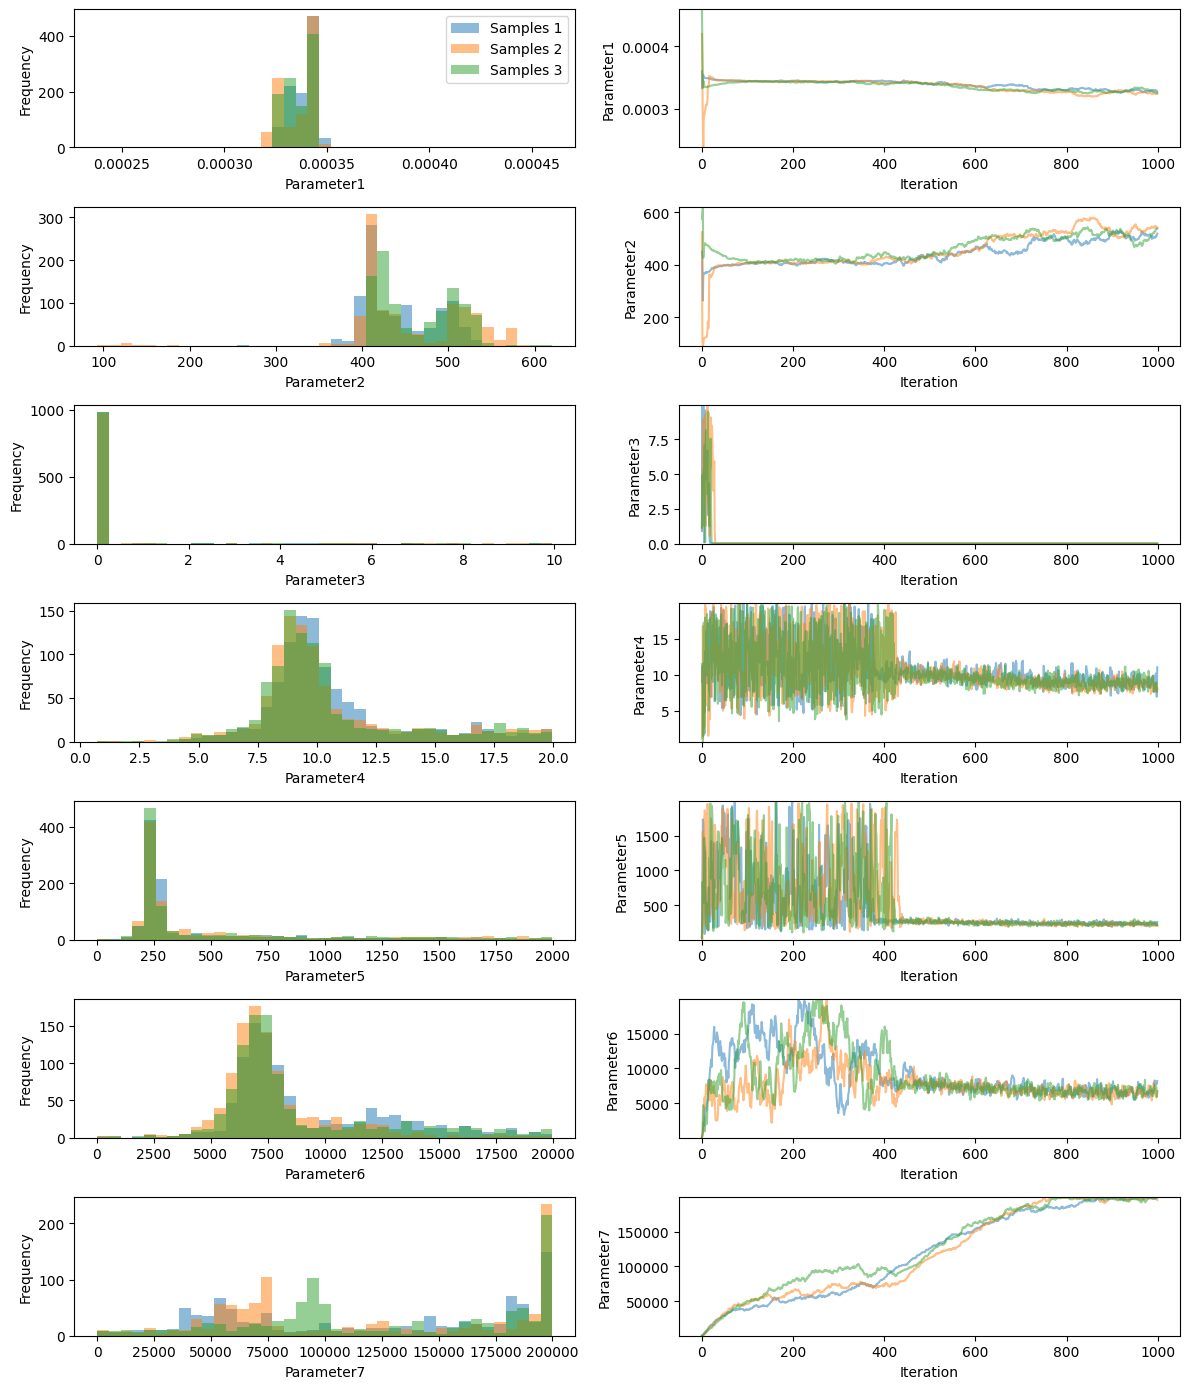

In [12]:

pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()


In [10]:

# ITERS = 100
AllChains = chains[0,:-int(3*ITERS/4),:]
for I in range(6-1):
    AllChains = np.concatenate((AllChains,chains[I+1,:-int(3*ITERS/4),:]))

parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3